# Notebook Cartão de Crédito

## 02.04 Obtendo a base de dados

In [41]:
import pandas as pd

dataframe = pd.read_csv('data/CC_GENERAL.csv')
dataframe.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [42]:
dataframe.shape

(8950, 18)

In [43]:
dataframe.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## 02.05 Organizando os dados

In [44]:
dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace=True)

In [45]:
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [46]:
dataframe.shape

(8950, 16)

In [47]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [48]:
dataframe['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

Adotaremos como estratégia a substituição desse valor pela mediana dos valores deste atributo de total de pagamentos minimos realizados. Não é um valor exato, e sim um aproximado por assim dizer.

In [49]:
dataframe.fillna(dataframe.median(), inplace=True)

missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


O próximo passo é normalizar nossos dados. Em alguns atributos relacionados à frequência, teremos um limite que varia de 0 a 1, sendo que 0 é 0% de frequência e 1, por sua vez, significa 100%. Para o atributo de balanço, não teremos a mesma organização de mínimo ou máximo, e isso pode fazer com que o algorítimo gere dados pouco satisfatórios para nós.

Para realizar a normalização dos dados todos entre zero e um, utilizaremos o biblioteca *Scikit learn*, importando o Normalizer do pacote ´´´sklearn.preprocessing´´´.

In [50]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


## 02.06 Executando o clustering

In [51]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)

y_pred = kmeans.fit_predict(values)

## 03.04 Critérios de validação

Métricas externas: Precisamos ter os labels 
Métricas internas: Independente dos labels

Dentro das métricas internas:

Critério de compactação: que nos relata quão próximos estão os pontos em um mesmo cluster. 

Critério de separação: que indica quão bem separados estão os pontos em clusters diferentes. 


## 03.04 Matemática de Silhouette

**_Coeficiente de Silhouette_**

$\displaystyle s = \frac{\beta - \alpha}{max(\alpha,\ \beta)} $

em que $\alpha$ é a **distância média** entre o ponto de interesse e todos os outros pontos do **mesmo cluster**. Vamos verificar a compactação dos elementos.

$\beta$ é a **distância média** entre o ponto de interesse e todos os outros pontos do **cluster mais próximo**.

## 03.05 Calculando o Silhouette

In [52]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3644412634503358


## 04.04 Matemática do Davies-Bouldin

**_Índice Davies-Bouldin_**

$\displaystyle DB = \frac{1}{k} \sum^{k}_{i=1} max \ R_{ij} \ (i \neq j)$

Em que $R_{ij}$ é dado por

$\displaystyle R_{ij} = \frac{s_i + s_j}{d_{ij}}$

sendo $s$ a similaridade dentro do cluster, isto é, **compactação**.  O $d$ reflete a similaridade entre clusters, a **separação**. Assim temos os dois critérios importantes para uma boa validação



## 04.05 Calculando o Davies-Bouldin

In [53]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.075779684998152


## 05.04 Matemática do Calinski (Parte 1)

Índice de **Calinski-Harabasz** leva em consideração a dispersão dos pontos dentro de um cluster, tanto nos pontos dentro de um cluster específico, como entre clusters diferentes, considerando a compactação e separação também.

$\displaystyle s = \frac{tr(B_k)}{tr(W_k)} \times \frac{n_E - k}{k - 1}$ 

$n_E$ é o número de elementos dentro do cluster.

$k$ é o número de clusters.

$B_k$ é a dispersão dos elementos entre clusters, sendo que a letra "B" significa between.

$W_k$ é a dispersão de elementos dentro do cluster. $W_k$ é calculado pela seguinte expressão:

$\displaystyle W_k = \sum_{q=1}^{k} \sum_{x \in C_q} (x - c_q) (x - c_q)^T$

em que $x$ é o valor do atributo e $c_q$ é o valor do centróide deste atributo para o cluster $q$.

$\sum_{x \in C_q} (x - c_q) (x - c_q)^T$ é uma matriz de **variância-covariância**(?)

**Esta explicação do curso está bem ruim. Atualizar quando possível**

## 05.05 Matemática do Calinski (Parte 2)

cálculo da matriz de variância-covariância para cada cluster

soma das matrizes de variância-covariância

cálculo do traço da matriz resultante

## 05.06 Matemática do Calinski (Parte 3)

$\displaystyle B_k = \sum_{q=1}^{k} n_q (c_q - c_E) (c_q - c_E)^T$

$k$ é o número de clusters.

$n_q$ = número de elementos no cluster

$c_q$ = centróide do cluster

$c_E$ = centróide dos elementos 

O índice de Calinski-Harabasz aqui é $s = 47,64$



## 05.07 Calculando o Calinski

In [54]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.7895561503533


## 06.04 A validação relativa

In [55]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)

    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)

    return s, dbs, calinski
    

In [56]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088433 3526.440519908274


In [57]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36442027909145003 1.0759278280692708 3431.7914339967483


In [58]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.30101650657749485 1.188653493713992 3002.9647082754745


In [59]:
s4, dbs4, calinski4 = clustering_algorithm(20, values)
print(s4, dbs4, calinski4)

0.2676957193405559 1.2498966265703937 2388.5619410353934


## 06.05 A estrutura dos clusters

In [60]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [61]:
import numpy as np

random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.039103083662285265 3.6411216244992035 304.596517843874
0.36442027909145003 1.0759278280692708 3431.7914339967483


## 06.06 A estabilidade dos clusters

In [62]:
set1, set2, set3 = np.array_split(values, 3)

s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36902919242843546 1.0532310304035093 1204.0425798212348
0.3532183246410258 1.1429408609552179 1194.9401425417566
0.36685269244474583 1.0988027839846313 1167.5299723518194


# 07.04 Gerando gráficos

<function matplotlib.pyplot.show(*args, **kw)>

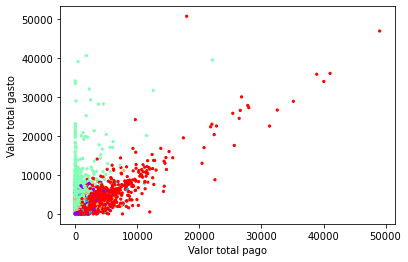

In [63]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show

## 07.05 Interpretação visual

In [64]:
import seaborn as sns

dataframe["cluster"] = labels
# sns.pairplot(dataframe[:], hue="cluster")

Note que este tipo de visualização não nos ajuda muito. Será que existem outras maneiras mais eficientes para lidar com clusters?

## 08.04 Descrevendo os atributos

In [65]:
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,3


In [66]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3276.0   444.212219   846.809334   0.000000    23.287145   
1         411.0  1987.501586  1854.459156  70.794108  1018.958891   
2        1072.0  1794.024195  1982.950586   0.000000   506.925348   
3        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
4        1542.0  1140.849944  1663.392377   0.000000   209.785397   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.992153   411.833075   9630.367575            3276.0  0.774280   
1        1337.287314  2138.678431  11670.179850             411.0  0.989486   
2        1087.920500  2308.762488  14581.459140            1072.0  0.862131   
3        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
4         552.999450  1370.230306  19043.138560            1542.0  0.928146   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       248.900782   4483.503862           3276.0  0.246293   
1        ...      7112.618584  76406.207520            411.0  0.019318   
2        ...       884.718306  21235.065300           1072.0  0.117384   
3        ...      1330.593643   8345.641905           2649.0  0.001799   
4        ...       523.776039  18621.013310           1542.0  0.279085   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346454  0.0  0.0  0.000000  0.444444  1.0  
1        0.090901  0.0  0.0  0.000000  0.000000  1.0  
2        0.186853  0.0  0.0  0.083333  0.142857  1.0  
3        0.023260  0.0  0.0  0.000000  0.000000  0.6  
4        0.367427  0.0  0.0  0.083333  0.545455  1.0  

[5 rows x 128 columns]

## 08.05 Analisando os valores

In [67]:
centroids = kmeans.cluster_centers_
print(centroids)

[[6.91172082e-02 2.30558192e-04 1.21221061e-01 4.79941328e-02
  7.33273099e-02 2.43612925e-02 1.72569863e-04 3.36877097e-05
  1.40000012e-04 7.93012041e-06 1.24086835e-04 2.85723913e-03
  9.43757893e-01 1.53487867e-01 5.68276323e-02 7.58208708e-05]
 [3.32918803e-01 2.68423552e-04 1.58240376e-01 3.63059801e-02
  1.22319068e-01 5.83557153e-02 1.66754597e-04 2.64938445e-05
  1.47063187e-04 1.93217566e-05 4.27934836e-04 3.86197017e-03
  3.76718873e-01 2.51861450e-01 6.80311114e-01 4.23993819e-06]
 [2.35141479e-01 2.16555293e-04 6.03857074e-02 3.44170171e-02
  2.59739049e-02 4.00128071e-01 5.26401668e-05 2.04882397e-05
  3.51921361e-05 6.54864556e-05 1.57199032e-03 1.12217156e-03
  5.35089146e-01 5.98040052e-01 1.04348171e-01 2.77498236e-05]
 [5.04289599e-01 2.72275541e-04 6.17031152e-02 3.61472866e-02
  2.55775500e-02 2.52998524e-01 6.73317111e-05 2.56982515e-05
  4.50750034e-05 5.74605324e-05 1.15731022e-03 1.33218565e-03
  7.19155598e-01 1.66164956e-01 1.79275871e-01 5.52512128e-07]
 [1.

## 08.06 Selecionando os atributos

In [68]:
max = len(centroids[0])

for i in range(max):
    print(dataframe.columns.values[i],"\n {:.4f}".format( centroids[:, i].var()))

BALANCE 
 0.0224
BALANCE_FREQUENCY 
 0.0000
PURCHASES 
 0.0196
ONEOFF_PURCHASES 
 0.0076
INSTALLMENTS_PURCHASES 
 0.0036
CASH_ADVANCE 
 0.0226
PURCHASES_FREQUENCY 
 0.0000
ONEOFF_PURCHASES_FREQUENCY 
 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
 0.0000
CASH_ADVANCE_FREQUENCY 
 0.0000
CASH_ADVANCE_TRX 
 0.0000
PURCHASES_TRX 
 0.0000
CREDIT_LIMIT 
 0.0360
PAYMENTS 
 0.0280
MINIMUM_PAYMENTS 
 0.0543
PRC_FULL_PAYMENT 
 0.0000


In [69]:
centroids[:, i].var()

1.0512425944051437e-09

In [70]:
dataframe

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,0


In [71]:
len(dataframe.columns.values[:-1])

16

In [72]:
len([centroids[:, i].var() for i in range(len(centroids[0]))])

16

construindo um dataframe com duas colunas (variáveis, variância)

In [73]:
teste = pd.DataFrame(
    list(zip(dataframe.columns.values[:-1], [centroids[:, i].var() for i in range(len(centroids[0]))])),
    columns=['variable', 'variance']
)

Ordenando o df com base nos valores de variância

In [74]:
teste.sort_values(['variance'], ascending=False, inplace=True)
teste

,variable,variance
14,MINIMUM_PAYMENTS,5.433148e-02
12,CREDIT_LIMIT,3.600505e-02
13,PAYMENTS,2.799771e-02
5,CASH_ADVANCE,2.255252e-02
0,BALANCE,2.241507e-02
2,PURCHASES,1.960190e-02
3,ONEOFF_PURCHASES,7.594857e-03
4,INSTALLMENTS_PURCHASES,3.582984e-03
11,PURCHASES_TRX,3.422304e-06
10,CASH_ADVANCE_TRX,3.312765e-07


Removendo a variável "MINIMUM_PAYMENTS"

In [75]:
teste = teste.loc[teste['variable'] != 'MINIMUM_PAYMENTS']

Selecionando as 5 variáveis com maiores variância

In [76]:
teste.iloc[:5]

,variable,variance
12,CREDIT_LIMIT,0.036005
13,PAYMENTS,0.027998
5,CASH_ADVANCE,0.022553
0,BALANCE,0.022415
2,PURCHASES,0.019602


## 08.07 Filtrando os valores

In [77]:
dataframe.groupby("cluster")["BALANCE"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3276.0,444.212219,846.809334,0.000000,23.287145,82.992153,411.833075,9630.367575
1,411.0,1987.501586,1854.459156,70.794108,1018.958891,1337.287314,2138.678431,11670.179850
2,1072.0,1794.024195,1982.950586,0.000000,506.925348,1087.920500,2308.762488,14581.459140
3,2649.0,3037.962543,2478.838161,6.824905,1256.612223,2174.018945,4223.867789,18495.558550
4,1542.0,1140.849944,1663.392377,0.000000,209.785397,552.999450,1370.230306,19043.138560


In [78]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         444.212219   629.173858    141.655729   5134.705973   814.396458   
1        1987.501586   854.865815    421.129352   2227.737226  1336.238911   
2        1794.024195   475.494823   3270.246792   3976.372399  4709.556601   
3        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
4        1140.849944  3265.827354    182.782018   4095.304897  3034.529963   

         n_clients  
cluster             
0             3276  
1              411  
2             1072  
3             2649  
4             1542  


<ipython-input-78-09694d8613d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


Uma forma automatizada de fazer a selecao seria:

In [79]:
selecao = teste["variable"].iloc[:5]
selecao

12    CREDIT_LIMIT
13        PAYMENTS
5     CASH_ADVANCE
0          BALANCE
2        PURCHASES
Name: variable, dtype: object

In [80]:
alt_description = dataframe.groupby("cluster")[selecao]
alt_description.mean()

,CREDIT_LIMIT,PAYMENTS,CASH_ADVANCE,BALANCE,PURCHASES
cluster,,,,,
0,5134.705973,814.396458,141.655729,444.212219,629.173858
1,2227.737226,1336.238911,421.129352,1987.501586,854.865815
2,3976.372399,4709.556601,3270.246792,1794.024195,475.494823
3,4495.771989,968.890376,1636.917210,3037.962543,385.248630
4,4095.304897,3034.529963,182.782018,1140.849944,3265.827354


## 09.04 Interpretando os clusters (Parte 1)

In [81]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         444.212219   629.173858    141.655729   5134.705973   814.396458   
1        1987.501586   854.865815    421.129352   2227.737226  1336.238911   
2        1794.024195   475.494823   3270.246792   3976.372399  4709.556601   
3        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
4        1140.849944  3265.827354    182.782018   4095.304897  3034.529963   

         n_clients  
cluster             
0             3276  
1              411  
2             1072  
3             2649  
4             1542  


<ipython-input-81-09694d8613d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


Analisando BALANCE

```
CLUSTER 0: clientes com os menores valores em gastos.
CLUSTER 1: clientes com os maiores valores em gastos.
CLUSTER 2:
CLUSTER 3: 
CLUSTER 4: 
```


Passaremos, então, para o atributo "PURCHASES", isto é, o valor em compras. Para este, não necessariamente precisamos fazer o mesmo esquema, e o menor valor está no cluster 1 e o maior em compras está no cluster 2, cuja diferença de valor é muito grande.

Olharemos o "CASH_ADVANCE" que diz respeito aos saques. Notaremos que o menor valor está no cluster 0, onde os clientes gastam menos no cartão de crédito, e já gastam mais no cluster seguinte. Porém, o maior valor em saques é no cluster 3.

```
CLUSTER 0: clientes com os menores valores em gastos. Menor valor em saques.
CLUSTER 1: clientes com os maiores valores em gastros. Menor valor em compras. Valor considerável em saques. 
CLUSTER 2: Maior valor em compras com grande diferença.
CLUSTER 3: Maior valor em saques.
CLUSTER 4:
```

Com base nas características que encontramos nos grupos por meio da análise dos três primeiros atributos, reescreveremos nossas anotações e deixaremos a interpretação mais simples.

```
CLUSTER 0: Clientes que gastam pouco.
CLUSTER 1: Clientes que mais gastam. O foco deles é saque.
CLUSTER 2: Clientes que gastam muito com compras.
CLUSTER 3: Clientes que gastam muito com saques.
CLUSTER 4:
```